Q-6. A pharmaceutical company is developing a drug that is supposed to reduce blood
pressure. They conduct a clinical trial with 100 patients and record their blood
pressure before and after taking the drug. The company wants to know if the change
in blood pressure follows a normal distribution.
https://drive.google.com/file/d/1mCjtYHiX--mMUjicuaP2gH3k-SnFxt8Y/view?usp=share_

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data_06.csv')

In [3]:
df.head()

,Patient ID,Blood Pressure Before,Blood Pressure After
0,1,130,120
1,2,142,135
2,3,120,118
3,4,135,127
4,5,148,140


### ANSWER

In [9]:
import pandas as pd
from scipy.stats import shapiro

bp_before = df['Blood Pressure Before']
bp_after = df['Blood Pressure After']

# Shapiro-Wilk test for normality
_, p_before = shapiro(bp_before)
_, p_after = shapiro(bp_after)

# Check the p-values
alpha = 0.05
if p_before > alpha and p_after > alpha:
    result = "The changes in blood pressure follow a normal distribution."
else:
    result = "The changes in blood pressure do not follow a normal distribution."

print(result)


The changes in blood pressure do not follow a normal distribution.


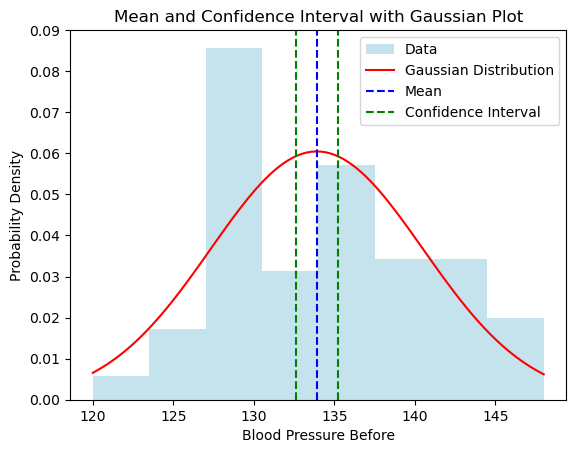

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats


bp_before_mean = df['Blood Pressure Before'].mean()
confidence_interval = stats.t.interval(0.95, len(df['Blood Pressure Before']) - 1, loc=bp_before_mean, scale=stats.sem(df['Blood Pressure Before']))
confidence_interval_lower = confidence_interval[0]
confidence_interval_upper = confidence_interval[1]


plt.hist(df['Blood Pressure Before'], bins='auto', density=True, alpha=0.7, color='lightblue', label='Data')


x = np.linspace(df['Blood Pressure Before'].min(), df['Blood Pressure Before'].max(), 100)
gaussian = stats.norm(bp_before_mean, df['Blood Pressure Before'].std())

plt.plot(x, gaussian.pdf(x), 'r-', label='Gaussian Distribution')


# Plot the mean and confidence interval as vertical lines
plt.axvline(bp_before_mean, color='blue', linestyle='--', label='Mean')
plt.axvline(confidence_interval_lower, color='green', linestyle='--', label='Confidence Interval')
plt.axvline(confidence_interval_upper, color='green', linestyle='--')

plt.xlabel('Blood Pressure Before')
plt.ylabel('Probability Density')
plt.title('Mean and Confidence Interval with Gaussian Plot')
plt.legend()


plt.show()
